## Perspective about Uganda

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#Reading data from a file
data = pd.read_csv('Uganda.csv')
data

,Timestamp,1. Sex,2. What is your origin country,"3. When you see the Ugandan Flag, what comes to your mind?","4. When you hear about the country Uganda, what comes to your mind?"
0,2020/08/28 12:48:57 AM GMT+5:30,Female,Uganda,Beauty,Home
1,2020/08/28 11:35:28 AM GMT+5:30,Female,Uganda...,"Nature ,Humanity & brotherhood",Peace and Hospitality
2,2020/08/28 6:35:51 PM GMT+5:30,Female,Uganda,Peace and brotherhood,The pearl of Africa with good nature and frien...
3,2020/08/28 6:39:37 PM GMT+5:30,Female,Uganda,Beauty,Pearl of Africa
4,2020/08/28 6:41:17 PM GMT+5:30,Female,Uganda,For God and my Country,County with freedom of worship
5,2020/08/28 6:41:40 PM GMT+5:30,Female,Uganda,For God and my Country,County with freedom of worship
6,2020/08/28 7:08:04 PM GMT+5:30,Female,Uganda,Nothing really... It's just the Ugandan flag.,"Politics, dictatorship."
7,2020/08/28 7:35:36 PM GMT+5:30,Female,Uganda,Peace,Pearl of Africa
8,2020/08/28 8:26:42 PM GMT+5:30,Female,Uganda,"Good weather, food",Good people
9,2020/08/28 8:57:47 PM GMT+5:30,Female,Uganda,Peace,Home


### --- Data Cleaning

In [3]:
data.describe(include="all")

,Timestamp,1. Sex,2. What is your origin country,"3. When you see the Ugandan Flag, what comes to your mind?","4. When you hear about the country Uganda, what comes to your mind?"
count,32,32,32,32,32
unique,32,2,5,26,25
top,2020/08/28 9:02:58 PM GMT+5:30,Female,Uganda,Beauty,Pearl of Africa
freq,1,26,19,4,5


In [4]:
#Deleting the Timestamp column
del data['Timestamp']

In [5]:
data.head()

,1. Sex,2. What is your origin country,"3. When you see the Ugandan Flag, what comes to your mind?","4. When you hear about the country Uganda, what comes to your mind?"
0,Female,Uganda,Beauty,Home
1,Female,Uganda...,"Nature ,Humanity & brotherhood",Peace and Hospitality
2,Female,Uganda,Peace and brotherhood,The pearl of Africa with good nature and frien...
3,Female,Uganda,Beauty,Pearl of Africa
4,Female,Uganda,For God and my Country,County with freedom of worship


In [6]:
#Renaming Column names
data_tidy = data.rename(columns = {'1. Sex': 'Gender', '2. What is your origin country': 'Country', 
                                  '3. When you see the Ugandan Flag, what comes to your mind?': 'Flag_Perception',
                                 '4. When you hear about the country Uganda, what comes to your mind?':'Uganda_Perception'}, 
                        inplace = False)
data_tidy




,Gender,Country,Flag_Perception,Uganda_Perception
0,Female,Uganda,Beauty,Home
1,Female,Uganda...,"Nature ,Humanity & brotherhood",Peace and Hospitality
2,Female,Uganda,Peace and brotherhood,The pearl of Africa with good nature and frien...
3,Female,Uganda,Beauty,Pearl of Africa
4,Female,Uganda,For God and my Country,County with freedom of worship
5,Female,Uganda,For God and my Country,County with freedom of worship
6,Female,Uganda,Nothing really... It's just the Ugandan flag.,"Politics, dictatorship."
7,Female,Uganda,Peace,Pearl of Africa
8,Female,Uganda,"Good weather, food",Good people
9,Female,Uganda,Peace,Home


### -- Saving Data in files

In [7]:
#Saving Flag_Perception df to a text file
data_tidy['Flag_Perception'].to_csv(r'flag_data.txt', header=None, index=None, sep='\t', mode='a')

In [8]:
#Saving Uganda_Perception df to a text file
data_tidy['Uganda_Perception'].to_csv(r'Uganda_data.txt', header=None, index=None, sep='\t', mode='a')

### --Data Analysis

<h4> Creating a wordCloud </h4>

In [9]:
#importing libraries
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

In [10]:
# Read the whole flag_data text.
text = open(path.join('flag_data.txt')).read()

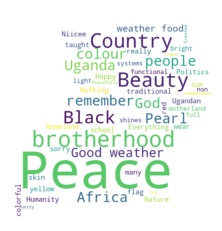

In [23]:
#Creating a wordcloud for Flag df
stopwords = set(STOPWORDS)

mask = np.array(Image.open('map.png'))

wc = WordCloud(background_color="white", max_words=2000, mask=mask, 
               max_font_size=256,random_state=42, 
               width=mask.shape[1],height=mask.shape[0],)

# generate word cloud
wc.generate(text)


# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [12]:
# Read the whole Uganda_data text
Ug_text = open(path.join('Uganda_data.txt')).read()

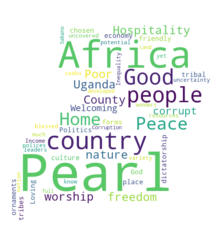

In [13]:
#Creating a wordcloud for Uganda df
stopwords = set(STOPWORDS)

mask = np.array(Image.open('map.png'))

wc = WordCloud(background_color="white", max_words=2000, mask=mask, 
               max_font_size=256,random_state=42, 
               width=mask.shape[1],height=mask.shape[0])

# generate word cloud
wc.generate(Ug_text)


# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()